<a href="https://colab.research.google.com/github/minat-hub/She-Code-Africa-Mentorship-Tasks/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path =  '/content/drive/MyDrive/SCA Dataset/netflix_titles.csv'
df=pd.read_csv(path)
df
# Dataset is now stored in a Pandas Dataframe

Mounted at /content/drive


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.isnull().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We have missing values in director, cast, country and date_added and rating column.


Director has the highest number of missing values. So we are going to start with replacing those missing values with the word 'missing'.

In [ ]:
#filling missing rows in director column with the keyword missing
df.director.fillna('missing', inplace=True)

In [ ]:
#filling missing rows in cast column with the keyword missing
df.cast.fillna('missing', inplace=True)

For cast column we fill the missing value with the missing keyword and also we create a dictonary which stores the unique cast value as key and the number of times it come in the dataset as value. This will help while performing the data analysis.

In [ ]:
data = []
for i in range(len(df)):
    data.extend(df.cast.iloc[i].split(','))
element = {}
for i in data:
    element[i] = data.count(i)
element = sorted(element.items(), key = lambda item: item[1], reverse=True)
len(set(element))

35373

In [ ]:
#filling missing rows in country column with the keyword missing
df.country.fillna('missing', inplace=True)

In [ ]:
#Dropping missing values in date_added column
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
df.rating.fillna('missing', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


We are done with handling the missing value in the dataset. Now we move forward and perform our analysis on the dataset.

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,missing,Nasty C,missing,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,missing,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


What Data we can extract from the dataset? We are going to:

1. split the date_added column into month, date and year.
2. split the listed_in column into different category.

In [ ]:
#new added month column
df['added_month'] = np.nan
for i in range(len(df)):
    df['added_month'][i] = df.date_added.iloc[i].split(' ')[0]

In [ ]:
#new added date column
df['added_date'] = np.nan
for i in range(len(df)):
    df['added_date'][i] = df.date_added.iloc[i].split(' ')[1][:-1]

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['added_year'] = df['date_added'].dt.year

#plt.bar(df.added_year.unique(), df.added_year.value_counts(), color='red');
#plt.xticks(rotation='90')

Since we are done with extraction from the date_added column, we drop this column from the dataset.

In [ ]:
df.drop('date_added', axis=1, inplace=True)

Splitting values in listed_in column.

In [ ]:
#Splitting values
listed_in = []
for i in range(len(df)):
    listed_in.extend(df.listed_in.iloc[i].split(','))

In [ ]:
#counting values in the newly created dictionary
listed_dic = {}
for i in listed_in:
    listed_dic[i] = listed_in.count(i)

In [ ]:
#sorting items in the dictionary
listed_dic = sorted(listed_dic.items(), key=lambda item: item[1], reverse=True)

In [ ]:

listed_dic = dict(listed_dic)

In [ ]:
#dropping any null values
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
added_month     0
added_date      0
added_year      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767 entries, 0 to 7776
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7767 non-null   object
 1   type          7767 non-null   object
 2   title         7767 non-null   object
 3   director      7767 non-null   object
 4   cast          7767 non-null   object
 5   country       7767 non-null   object
 6   release_year  7767 non-null   int64 
 7   rating        7767 non-null   object
 8   duration      7767 non-null   object
 9   listed_in     7767 non-null   object
 10  description   7767 non-null   object
 11  added_month   7767 non-null   object
 12  added_date    7767 non-null   object
 13  added_year    7767 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 910.2+ KB


QUESTIONS WE ARE GOING TO BE ANSWERING WITH OUR ANALYSIS

* What are the different types of content uploaded on Netflix and their percentages? 
* Which director appeared the most on the Netflix dataset?
* Which director directed the highest number of TV shows?
* Which celebrity was cast the most?
* Top 20 countries where content were produced?
* In which month were these shows added onto the Netflix mainly?
* Which year had the highest number of entries for shows?
* By release year, which one grew in popularity? TV Shows or Movies
* I want to release a movie on netflix, which tag should i add that can help boost my views?
* What can you infer from the duration column?
* What are the different types of ratings on the Netflix and which one is the most popular?
* What are the Top ten Genres found on the Netflix?
* Show the correlation relationships between the different genres




In [ ]:
#To check for number of tv shows and movies that we have in our dataset
content_count = df['type'].value_counts().sort_values()
print(content_count)

TV Show    2397
Movie      5370
Name: type, dtype: int64


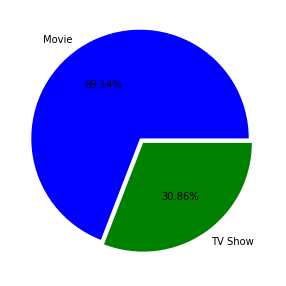

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Blue','Green'])
plt.show()

The pie chart above shows that more than half of our Netflix dataset are movies. Seems people prefer  over movies because of:
*  Movies are more intense:
In TV shows one episode can be intense but not all. In comparison, movies are more intense than the show. It will keep you intact at your seat.

* They have special effect:
Movies have a better special effect and also can cut out any unnecessary shots from the movie. Whether in TV shows some shots are kept to extend the episode which loses people’s interest.

* Movies are easier to access:
This means you can watch movies anywhere and anytime. Whereas TV shows have fixed timing and date for each episode whereas all the online platforms give you access to watch movies whenever you want. Whether it is early in the morning or at the middle of the night visit movies123 online site and watch movies without interruptions.

* Movies are easier to understand:
Whenever you compare movies with TV shows, there is a vast difference like in film you can assume whatever is going to happen in next couple of minutes and keeps you at your seat till the
interval. But in TV shows a few episodes make you whin what is happening and what will happen in the next couple of minutes or episodes. It can take you on a roller coaster ride when you watch TV shows.

* Movies need not be visualised early:
You need to sit for 2 hours at a stretch, and the film is done. Whereas you need to sit every day in front of the TV and think and try to visualise what will happen next. Movies help you understand the story better and at a go.

* Lots of art forms can be incorporated:
In movies, you can include many art forms whereas in TV shows you don’t get them to see and they do not have much access to it.

* The social aspect:
You can take out time and go with your friends to watch movies whereas in TV shows your friends may not like to be a part of that show along with you. It may be of interest to you but not to your friends. But in movies even if you can take your friends because it takes less time and you do not know it may interest your friends too.



In [ ]:
director_count = df['director'].value_counts()
print(director_count)
#most of the director dataset is missing

missing                          2375
Raúl Campos, Jan Suter             18
Marcus Raboy                       16
Jay Karas                          14
Cathy Garcia-Molina                13
                                 ... 
Nitesh Tiwari                       1
Max Amini                           1
Bassam Tariq                        1
Suparn Verma                        1
Drea Cooper, Zackary Canepari       1
Name: director, Length: 4046, dtype: int64


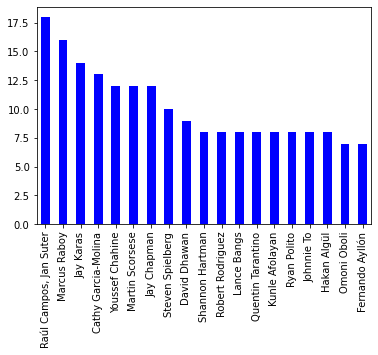

In [ ]:
#Our top 20 common directors
df.director.value_counts()[1:20].sort_values(ascending=False).plot(kind='bar', width=0.5, color='Blue')

Raúl Campos, Jan Suter are the most common directors that direct the contents found on the Netflix dataset. We can also check the type of content i.e. TV Show or Movie that they directed.

Text(0.5, 1.0, 'TV Show')

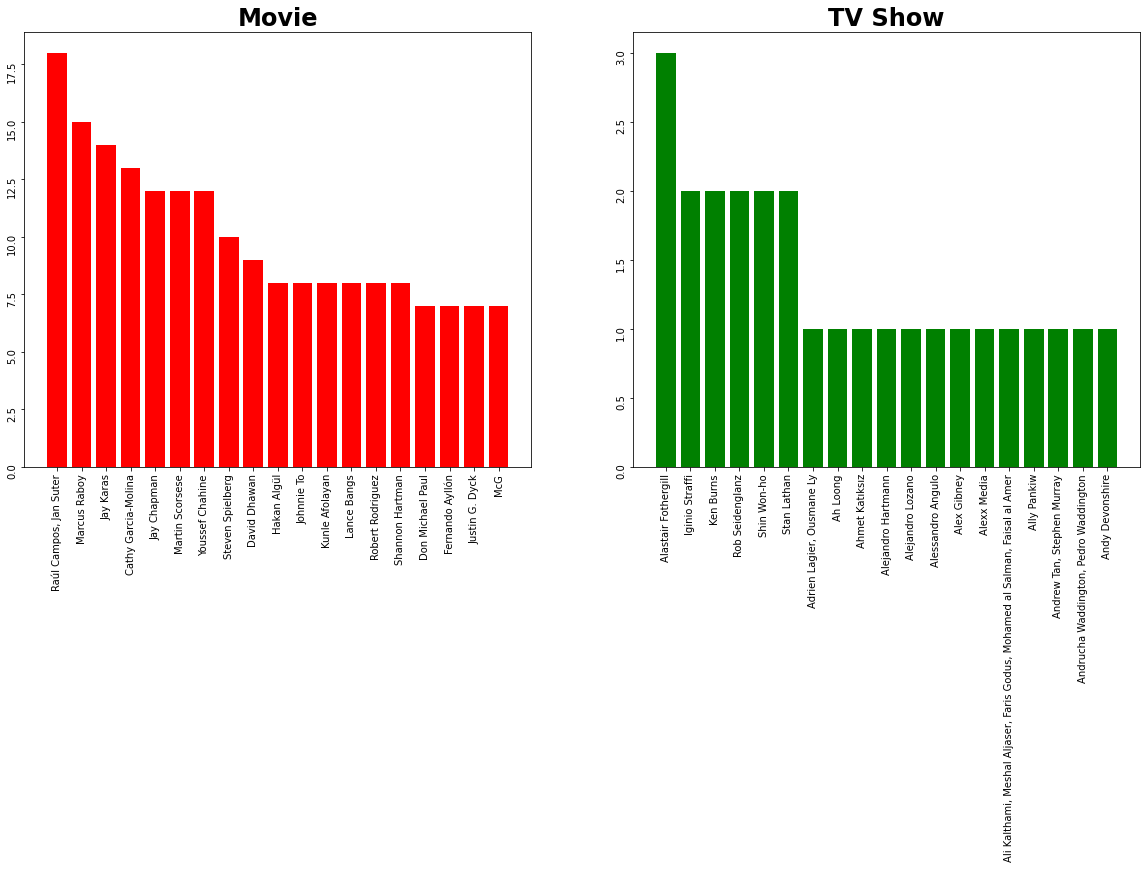

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
data = df.groupby('type')['director'].value_counts()['Movie'][1: 20]
data = pd.DataFrame(data)
ax1.bar(data.index, data.director, color='red')
ax1.tick_params(labelrotation=90)
ax1.set_title('Movie', fontsize=24, fontweight='bold')
data2 = df.groupby('type')['director'].value_counts()['TV Show'][1: 20]
data2 = pd.DataFrame(data2)
ax2.bar(data2.index, data2.director, color='green')
ax2.tick_params(labelrotation=90)
ax2.set_title('TV Show', fontsize=24, fontweight='bold')

Raúl Campos, Jan Suter directs Movies that are uploaded on the Netflix and Alastair Fothergill mostly directs TV Shows that were found on the Netflix.

In [ ]:
#dictionary of actors and how many contents they appeared in
dic_element = dict(element[1:])
print(dic_element)

{' Anupam Kher': 38, ' Takahiro Sakurai': 28, ' Om Puri': 27, 'Shah Rukh Khan': 27, ' Boman Irani': 25, ' Paresh Rawal': 24, ' Andrea Libman': 24, ' Yuki Kaji': 23, 'Akshay Kumar': 22, ' Vincent Tong': 22, ' Kareena Kapoor': 20, ' John Cleese': 20, 'Adam Sandler': 19, ' Gulshan Grover': 18, ' Naseeruddin Shah': 18, ' Ai Kayano': 18, 'Amitabh Bachchan': 18, ' Yashpal Sharma': 18, 'David Attenborough': 18, ' Junichi Suwabe': 18, ' Fred Tatasciore': 17, ' Kana Hanazawa': 17, ' Asrani': 17, ' Erin Fitzgerald': 16, ' Amrish Puri': 16, 'Ajay Devgn': 16, ' Michael Palin': 16, ' Daisuke Ono': 16, ' Ashleigh Ball': 16, 'Nicolas Cage': 16, ' Manoj Joshi': 16, ' Hassan Hosny': 16, ' Tomokazu Sugita': 16, ' Sean Astin': 15, ' Kay Kay Menon': 15, ' Tinnu Anand': 15, ' Pankaj Tripathi': 15, ' Tara Strong': 15, ' Vijay Raaz': 15, ' Rajesh Sharma': 15, ' Alessandro Juliani': 15, ' Eric Idle': 15, ' Diana Kaarina': 15, ' Danny Trejo': 14, ' Jackie Shroff': 14, 'Aamir Khan': 14, ' Maya Rudolph': 14, ' A

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

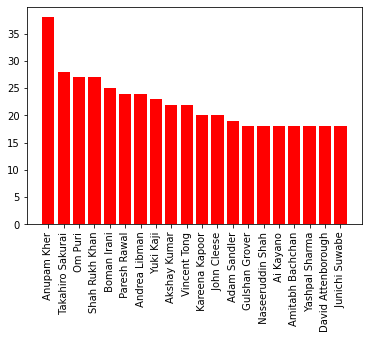

In [ ]:
dic_element = dict(element[1:])
dic_element_key = list(dic_element.keys())
dic_element_value = list(dic_element.values())
plt.bar(dic_element_key[:20], dic_element_value[:20], color='red')
plt.xticks(rotation='vertical')

Anupam Kher is the most common cast that is found on the Netflix dataset. He mostly appears in netflix indian movies.

Top-20 countries producing the most content:
 To get content produced in different countries, we have to split those rows and get the individual country.

In [ ]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

In [ ]:
top20country = country_count.head(20)
print(top20country)

United States     3288
India              988
United Kingdom     720
missing            504
Canada             411
France             349
Japan              286
Spain              215
South Korea        212
Germany            199
Mexico             153
China              147
Australia          142
Egypt              110
Turkey             108
Hong Kong          102
Italy               90
Brazil              88
Taiwan              85
Belgium             85
dtype: int64


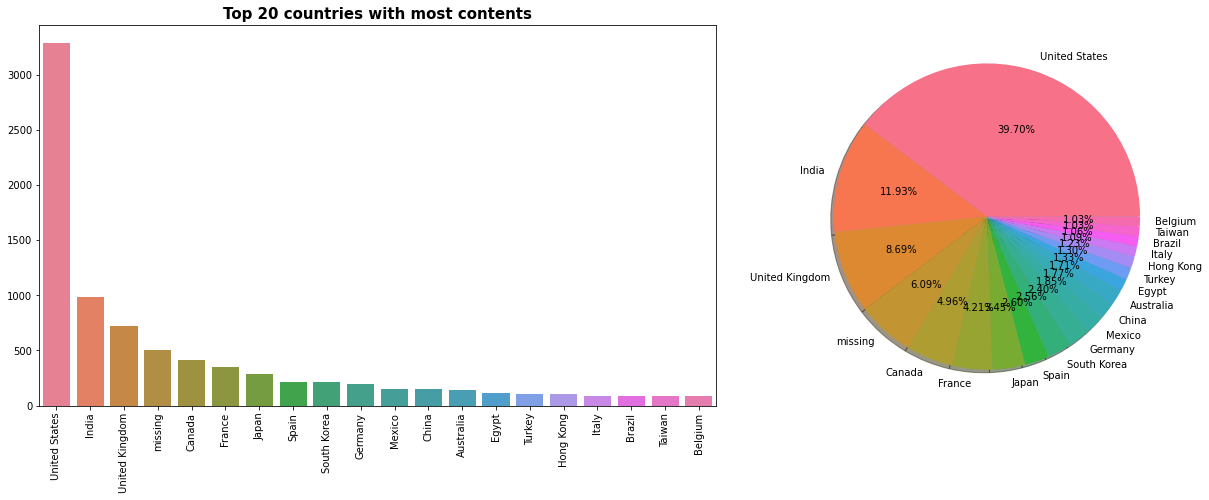

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20country.index, top20country, ax=ax, palette="husl")
ax.set_xticklabels(top20country.index, rotation='90')
ax.set_title('Top 20 countries with most contents', fontsize=15, fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(top20country, labels=top20country.index, shadow=True, startangle=0, colors=sns.color_palette("husl", n_colors=20),
       autopct='%1.2f%%')
ax2.axis('equal') 

plt.show()

We can see that US, India, United Kingdom, Canada and France contribute 75% of the top20 countries percentage. Most content found  on netflix are produced in the US and this might be because netflix is a US-based company.

**Contents added by month and year**

In [ ]:
cn = df.added_month.value_counts()[:-1]
print(cn)

December     814
October      779
January      746
November     729
March        659
August       612
September    612
April        596
July         591
June         538
May          537
February     466
Name: added_month, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

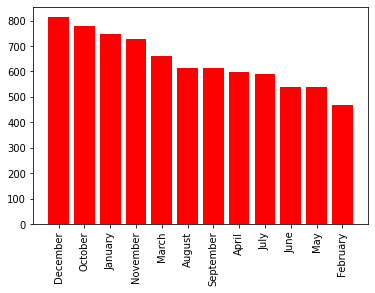

In [ ]:
plt.bar(df.added_month.value_counts().index[:-1], df.added_month.value_counts()[:-1], color='red');
plt.xticks(rotation='90')

So most of the TV Shows and Movie that were added on the Netflix was in the month of December. February had the least number of entries. The reason why December has the highest number of entries might be because netflix drops new seasons of tv shows  and movies around this period because it is christmas month and they believe people will have more time to binge watch their favorite series and movies.

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [ ]:
import plotly.graph_objects as go
df_content = df['added_year'].value_counts().reset_index().rename(columns = {
    'added_year' : 'count', 'index' : 'added_year'}).sort_values('added_year')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['added_year'].value_counts().reset_index().rename(columns = {
    'added_year' : 'count', 'index' : 'added_year'}).sort_values('added_year')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['added_year'].value_counts().reset_index().rename(columns = {
    'added_year' : 'count', 'index' : 'added_year'}).sort_values('added_year')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['added_year'], y=df_movies1["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv1['added_year'], y=df_tv1["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['added_year'], y=df_content["count"], name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Netflix's initial business model included DVD sales and rental by mail, but the founder abandoned the sales about a year after the company was founded to focus on the initial DVD rental business.Netflix expanded its business in 2007 with the introduction of streaming media while retaining the DVD and Blu-ray rental business. The company expanded internationally in 2010 with streaming available in Canada, followed by Latin America and the Caribbean. Netflix entered the content-production industry in 2013, debuting its first series House of Cards. This is probably the reason why the growth in content started from 2013.

The growth in number of movies on netflix is much higher than that of TV shows

About 1200 new movies were added in both 2018 and 2019. 2019 has the highest number of contents added. I was expecting more contents to have been added in 2020 as we have seen that we had steady growth of entries until then, I think content added reduced in 2020 because of the pandemic, there was lock down and production for most series and movies were halted.



In [ ]:
gf = df.groupby('type')['release_year'].value_counts()['Movie'].sort_values(ascending=False)[:20]
print(gf)

release_year
2017    744
2018    733
2016    642
2019    580
2020    411
2015    381
2014    244
2013    202
2012    158
2010    136
2011    127
2008    102
2009    102
2007     72
2006     71
2005     60
2004     50
2003     40
2002     39
2001     32
Name: release_year, dtype: int64


Text(0.5, 1.0, 'Release Year of TV Show')

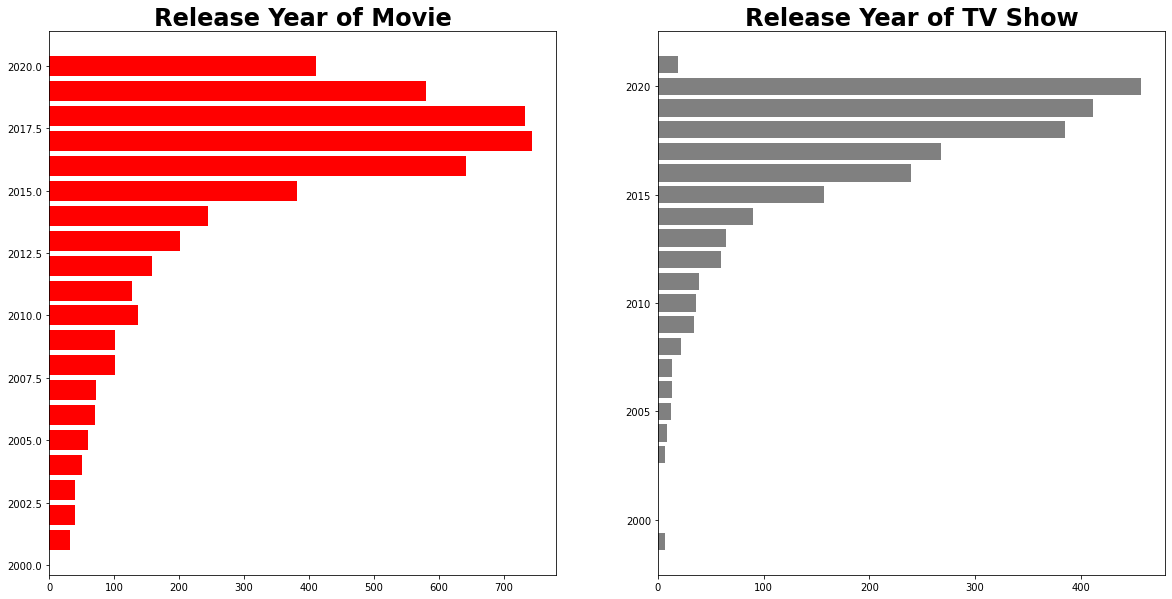

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
df_movie = pd.DataFrame(df.groupby('type')['release_year'].value_counts()['Movie'].sort_values(ascending=False)[:20])
ax1.barh(df_movie.index, df_movie.release_year, color='red')
ax1.set_title('Release Year of Movie', fontsize=24, fontweight='bold');
df_tv = pd.DataFrame(df.groupby('type')['release_year'].value_counts()['TV Show'].sort_values(ascending=False)[:20])
ax2.barh(df_tv.index, df_tv.release_year, color='grey')
ax2.set_title('Release Year of TV Show', fontsize=24, fontweight='bold')

This shows that in the year 2020, Tv shows were released more than movies on Netflix.

In [ ]:
print(listed_dic)

{' International Movies': 2323, 'Dramas': 1384, 'Comedies': 1074, 'Documentaries': 751, ' Dramas': 722, 'Action & Adventure': 721, 'International TV Shows': 689, ' Independent Movies': 653, ' TV Dramas': 641, ' Romantic Movies': 528, ' International TV Shows': 509, 'Children & Family Movies': 502, ' Thrillers': 442, ' TV Comedies': 409, ' Comedies': 397, 'Crime TV Shows': 369, "Kids' TV": 357, 'Stand-Up Comedy': 321, ' Romantic TV Shows': 305, ' Music & Musicals': 304, 'Horror Movies': 244, 'British TV Shows': 231, ' Sci-Fi & Fantasy': 207, ' Sports Movies': 195, 'Docuseries': 193, ' Docuseries': 159, ' Korean TV Shows': 150, 'Anime Series': 147, ' Spanish-Language TV Shows': 144, ' Reality TV': 120, 'International Movies': 114, ' TV Action & Adventure': 113, 'TV Comedies': 109, 'Reality TV': 102, ' TV Mysteries': 90, ' LGBTQ Movies': 89, ' Science & Nature TV': 85, 'Classic Movies': 77, ' TV Sci-Fi & Fantasy': 74, ' Horror Movies': 68, 'TV Dramas': 62, ' Teen TV Shows': 60, ' TV Horro

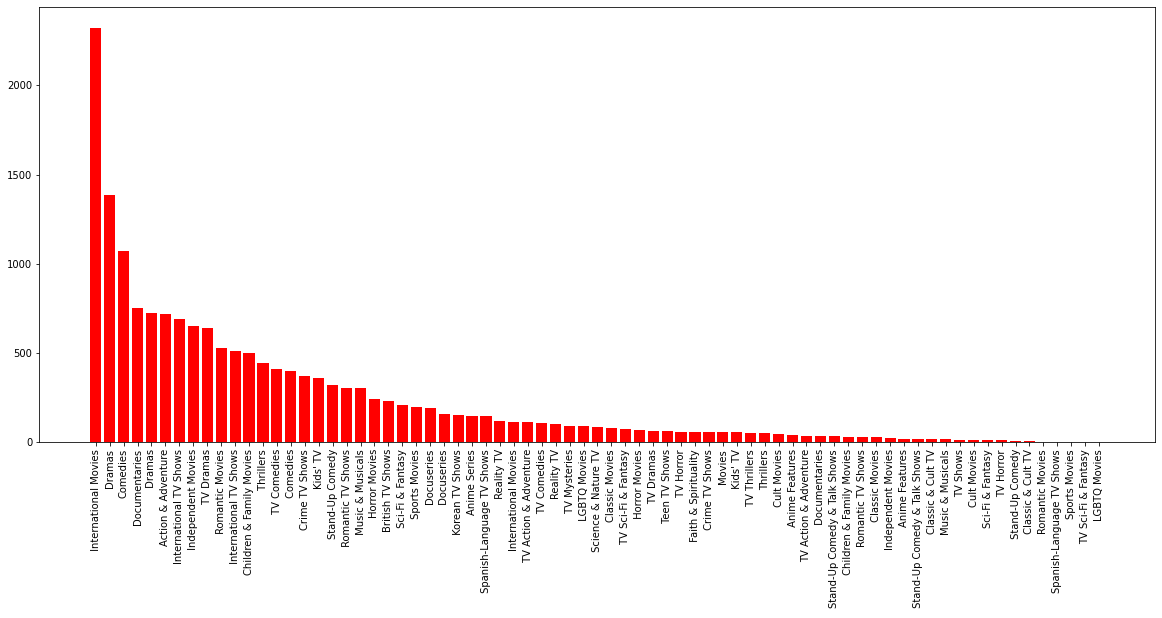

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(listed_dic.keys(), listed_dic.values(), color='red')
plt.xticks(rotation='90');

Most of the Movies on Netflix had the International Movies tag. So to make the Show or Movie famous you probably have to have International Movie tag on your content so it will be able to reach a global audience.

In [ ]:
df.duration.value_counts()

1 Season     1606
2 Seasons     377
3 Seasons     183
90 min        135
93 min        131
             ... 
191 min         1
43 min          1
228 min         1
16 min          1
214 min         1
Name: duration, Length: 216, dtype: int64

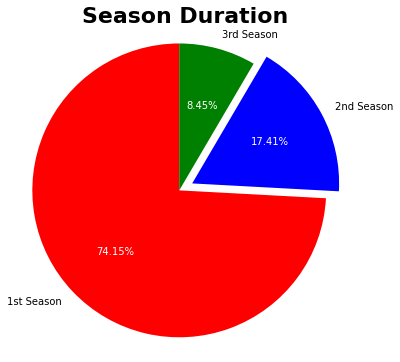

In [ ]:
plt.figure(figsize=(6, 6))
labels=['1st Season', '2nd Season', '3rd Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.0), colors=['red', 'blue', 'green'])
plt.axis('equal')
plt.title('Season Duration', fontsize=22, fontweight='bold');
for text in texts:
    text.set_color('white')

Most tv shows have 1st seasons than other seasons. This is a question that people have been asking since the dawn of streaming - why do streaming services cancel shows after the first or second season? I think that people are surprised when a show gets canceled after a season because we have two different ways of looking at a television show - the qualitative artistic, emotional appeal of the show, and the quantitative, business appeal of the show.

In my opinion, when we watch TV, most of the time we’re only looking at the qualitative aspects of the show - do I like the show, does the show appeal to me on a personal level, do I find the plot and characters compelling to me, do I want to keep watching, is it appealing to the eye, is the writing appealing to the ear and mind?

Very, very rarely do we watch a piece of television in order to discover the quantitative aspects - think about whether you’ve ever looked up the ratings for a show, the target demographic, the viewership among different age groups, how many episodes people usually watch, the number of viewers who engage with the content in the first week upon release, the viewership of the show in comparison to shows of a similar genre on the streaming service.

Over years of watching and analyzing both television shows as well as the business model of streaming services, I’ve come up with this observation:

We (the viewer) focus primarily on the qualitative aspects of a television show and forget the quantitative. Streaming services focus primarily on the quantitative aspects of a show, and the qualitative aspects of a show aren’t a priority in the business model.

There’s a fundamental disconnect between consumer and producer here.

We (the viewer) would like to believe that streaming services like Netflix are striving to provide the consumer with qualitatively good content. So, if we like a show that is really great qualitatively but is struggling quantitively, we assume that Netflix is going to keep the show because they share our appreciation.

The streaming service isn’t taking the qualitative aspects into consideration at all - their sole goal is keeping the content that does well quantitatively. So if a really well produced and executed show is doing bad ratings-wise, Netflix has no obligation to consumers to keep that show on the service. If anything, Netflix is going to assume that since a well-executed show is getting low reviews, that a majority of people didn’t actually want to watch the show.

Here’s the tough truth - Netflix is a business - they don’t care about the unresolved plot holes, the arc that was developed, whether or not we liked the characters, if we connected to the show - they’re solely looking at numbers here. We, on the other hand, have a personal investment in the television we like - we don’t care about the numbers. So - Netflix can afford to throw low-rated shows into the trash and replace them with new content - the only real price here is the emotional toll it takes on consumers who had an emotional investment in the shows that were thrown away.


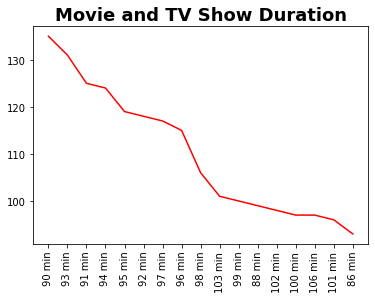

In [ ]:
plt.plot(df.duration.value_counts().index.to_list()[3: 20], df.duration.value_counts()[3:20], color='red')
plt.xticks(rotation='90')
plt.title('Movie and TV Show Duration', fontsize=18, fontweight='bold');

Most of the Movies and TV Shows are of duration of 90 mins on Netflix

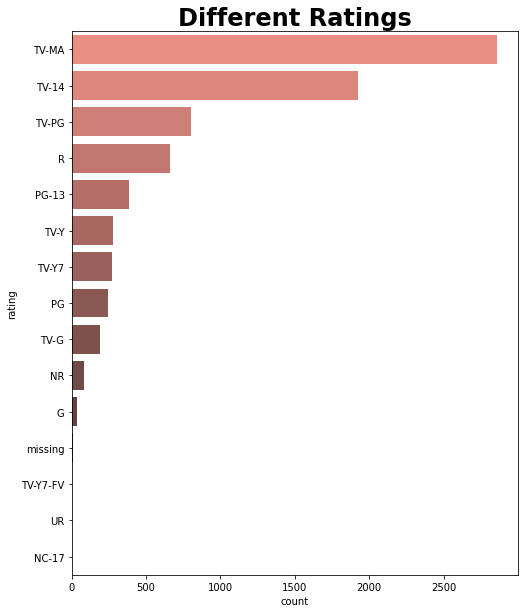

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(y='rating', data=df, order=df.rating.value_counts().index.to_list(), palette='dark:salmon_r')
plt.title('Different Ratings', fontsize=24, fontweight='bold');

So, TV-MA is the most common rating on Netflix. This rating is mature adults and it might be the most common rating because it is adults that are paying for the subscription. And netflix largest audience range from 16 - 34 years old.

**Top10 Genre in Movies and TV Shows**

In [ ]:
df_movies["listed_in"].value_counts()

Documentaries                                            334
Stand-Up Comedy                                          321
Dramas, International Movies                             319
Comedies, Dramas, International Movies                   243
Dramas, Independent Movies, International Movies         214
                                                        ... 
Action & Adventure, Cult Movies                            1
Dramas, Faith & Spirituality, Romantic Movies              1
Classic Movies, Independent Movies, Thrillers              1
Horror Movies, International Movies, Sci-Fi & Fantasy      1
Sci-Fi & Fantasy                                           1
Name: listed_in, Length: 265, dtype: int64

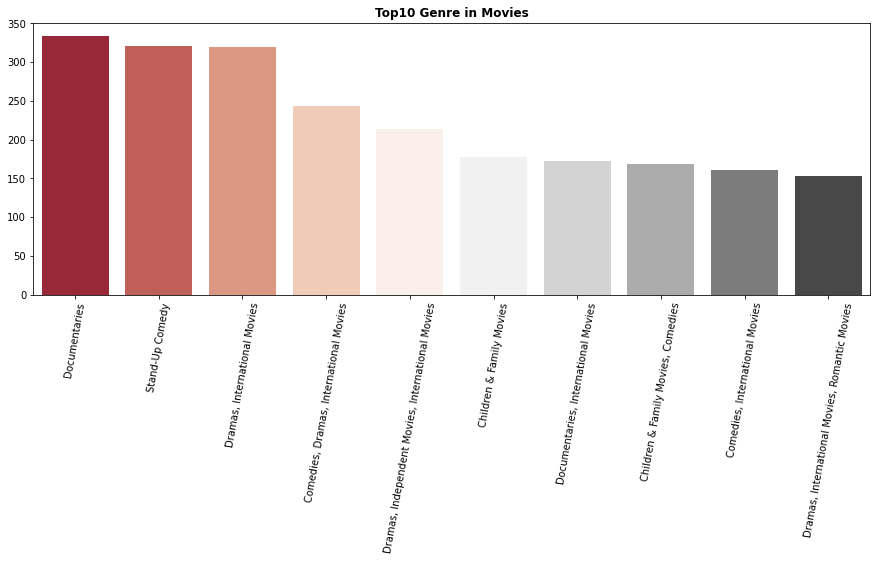

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

Documentaries claiming a staggering overall score of 334 – revealing a global thirst for knowledge. With 19,986 Instagram hashtags contributing 128 points for popularity, and a Google Trends search average of 56, it seems the world’s gone wild for Blue Planet and Tiger King.



In [ ]:
dfs_tv = df[df["type"] == "TV Show"]

In [ ]:
dfs_tv["listed_in"].value_counts()

Kids' TV                                                      204
International TV Shows, TV Dramas                             111
Crime TV Shows, International TV Shows, TV Dramas             106
Kids' TV, TV Comedies                                          89
International TV Shows, Romantic TV Shows, TV Dramas           86
                                                             ... 
TV Action & Adventure, TV Dramas, Teen TV Shows                 1
TV Comedies, TV Horror, TV Thrillers                            1
Docuseries, Science & Nature TV, TV Dramas                      1
Anime Series, TV Horror, TV Thrillers                           1
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy      1
Name: listed_in, Length: 225, dtype: int64

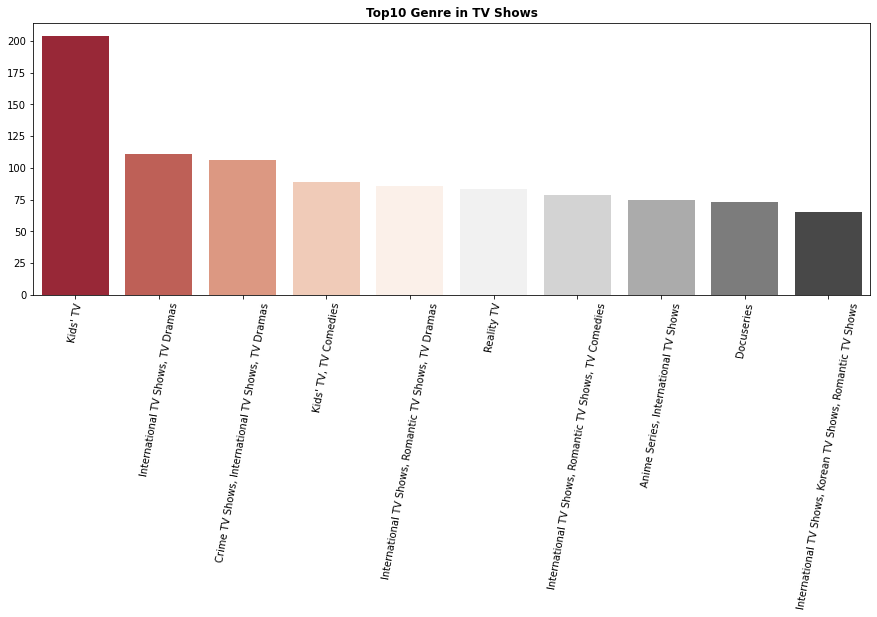

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = dfs_tv["listed_in"].value_counts().head(10).index,
            y = dfs_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

I think kid's tv is in the lead because it encompass all the genres for kids, like drama, adventure etc are all included in kids tv genre.


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 
#Multilabelbinarizer allows you to encode multiple labels per instance.
def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


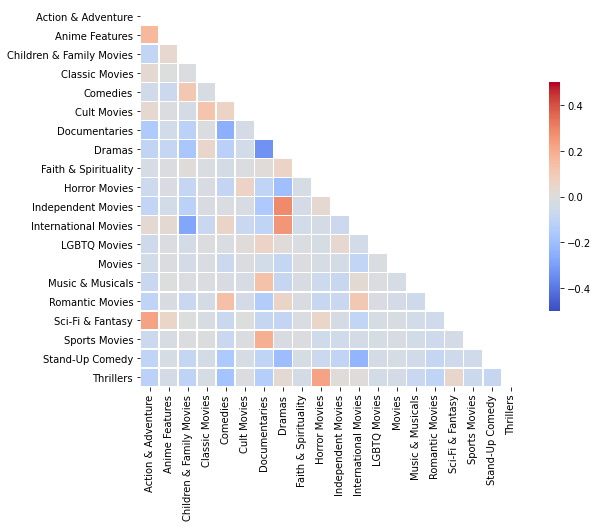

In [ ]:
relation_heatmap(df_movies, 'Movie')

The negative relationship between drama and documentary is remarkable.
For independent and international films, we are seeing a neutral correlation.
And there is a strong correlation between Sci-Fi & Fantasy and action & Adventure. The negative relationship impliies that the probability of the two genres together is very low and positive relationship implies that the probability of the two genres together is high i.e they go together. 

There are 22 types in the Netflix TV Show Dataset


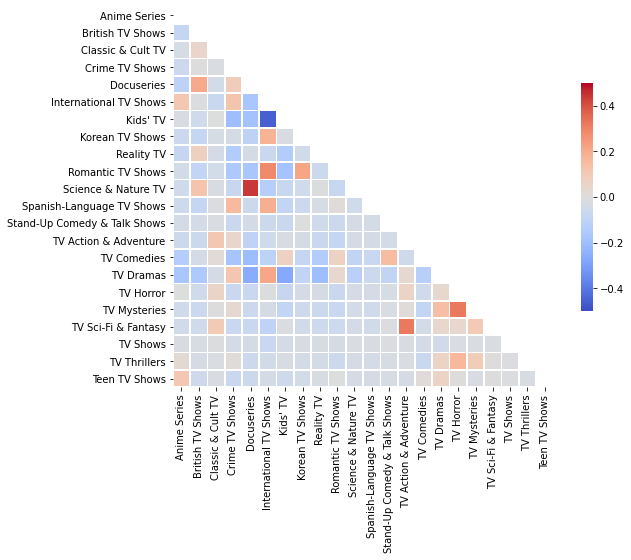

In [ ]:
relation_heatmap(dfs_tv, 'TV Show')



The negative relationship between kid's TV and International Tv Shows is remarkable. This can mean these two genres do not go together.

There is a strong positive corelation between Science & Natural and Docuseries. This can mean that most science and nature genre are also docuseries.